In [8]:
import plotly.graph_objects as go
from data_processing import scaler
#from jupyter_dash import JupyterDash

### Import Data - `vet_coords` (Nov 21,2020)

In [4]:
vets = pd.read_csv('vets_coords.csv',  encoding="ISO-8859-1")

### Scaler workflow to change size of bubble markers
- insert `Combined` column
- Change range accordingly

In [23]:
vets['scaled'] = scaler(vets['Combined'], bottom_range=6, top_range=24)

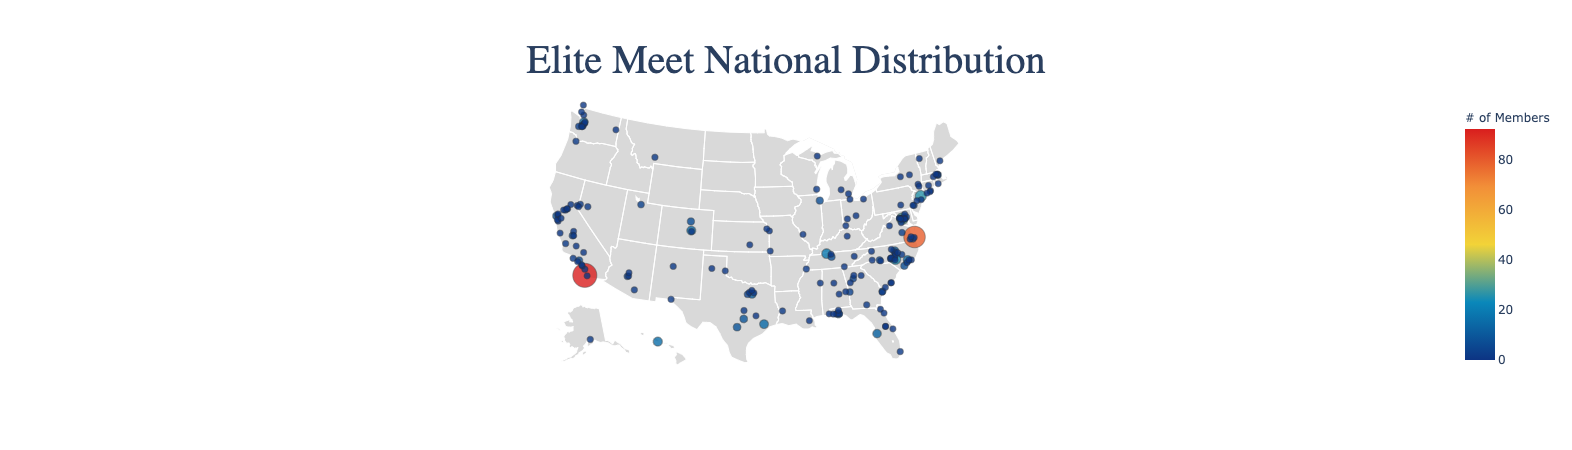

In [24]:
fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = vets['longitude'],
        lat = vets['latitude'],
        text = vets['text'],
        mode = 'markers',
        hoverinfo='text',
        marker = dict(
            size = vets['scaled'],
            opacity = 0.8,
            reversescale = False,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=0.5,
                color='rgb(40,40,40)'
            ),
            colorscale = 'portland',
            cmin = 0,
            color = vets['Combined'],
            cmax = vets['Combined'].max(),
            colorbar_title="# of Members"
        )))

update = fig.update_layout(
        title = 'Elite Meet National Distribution',
        title_font_family='Garamond',
        title_font_size=40,
        title_x=0.5,
        title_y=0.9,
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(217, 217, 217)",
            #subunitcolor = "rgb(217, 217, 217)",
            #countrycolor = "rgb(217, 217, 217)",
            #countrywidth = 1.5,
            #subunitwidth = 1.5
        )
    )
fig.show()

### Save file as an html index and then git push to remote repository

In [24]:
fig.write_html("index.html")

### Resave latest version of dataframe so that you don't have to update `vets['scaled']`every time

In [25]:
vets.to_csv('vets_coords.csv', index=False)

### Template for adding a new location - change .loc, and series values as needed

In [16]:
vets.loc[196] = pd.Series({'Combined':1, 'Location':'Richmond, VT', 'Coordinates':'Richmond, Vermont', 'latitude':44.4053, 'longitude':-72.9924,
       'scaled':4.0613, 'text':'Richmond, VT: 1'})